# RFM SEGMENTATION WITH PYTHON
Data Source: https://www.kaggle.com/carrie1/ecommerce-data


# Loading Data

In [44]:
# importing required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns

In [45]:
#load dataset using pandas
data=pd.read_excel('Online Retail.xlsx')

# Exploring the Data

In [46]:
#Sneak Peack of the data| Top 5 columns 
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


# About the Data
The data contains 8 columns with customer transactions. The focus columns in this analysis are: Date, Price & Customer ID


In [47]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


# DATA PREPARATION

In [49]:
#Checking for duplicate Values
data[data.duplicated()].any()

InvoiceNo      True
StockCode      True
Description    True
Quantity       True
InvoiceDate    True
UnitPrice      True
CustomerID     True
Country        True
dtype: bool

In [50]:
#Dropping Duplicates
data.drop_duplicates(inplace=True)
#Data Cleaning
data = data[(data['Quantity'] > 0) & (data['UnitPrice'] > 0) & (data['CustomerID'].notnull())]

In [51]:
#Checking if duplicates have been dropped
data[data.duplicated()].any()

InvoiceNo      False
StockCode      False
Description    False
Quantity       False
InvoiceDate    False
UnitPrice      False
CustomerID     False
Country        False
dtype: bool

In [52]:
#Checking for the number of unique Customers
data['CustomerID'].nunique()

4338

In [53]:
# Checking for the total number of transaction records
data.shape

(392692, 8)

In [54]:
#Check dtype for InvoiceDate
type(data.InvoiceDate)

pandas.core.series.Series

In [55]:
# Checking for the max and min InvoiceData inorder to calculate number of months of data available
print('Min:{}; max:{}'.format(min(data.InvoiceDate),max(data.InvoiceDate)))

Min:2010-12-01 08:26:00; max:2011-12-09 12:50:00


In [56]:
# #Convert InvoiceDate to datetime for manupulation
# data["InvoiceDate"] = pd.to_datetime(data["InvoiceDate"])
# data["InvoiceDate"]

# COHORT ANALYSIS
Descriptive analytics tool used to group customers into mutually exclusive cohorts measured over time.
Helps understand high level trends better by providing insight on metrics across products ans Customer life cycle.

# Assign Acquisition Month Cohort to each Customer

In [57]:
# Define a function that will parse the date, it truncates given date obect to the first day of the month
def get_month(x): return dt.datetime(x.year, x.month, 1) 

# Apply get_month method to invoiceDate and create InvoiceMonth Column
data['InvoiceMonth'] = data['InvoiceDate'].apply(get_month) 

# Create groupby Obj with CustomerID & use Invoice Month column for further Manipulation
grouping = data.groupby('CustomerID')['InvoiceMonth'] 

# Finally Transform with min function to assign the smallest InvoiceMonth Value to each Customer in the DataSet
data['CohortMonth'] = grouping.transform('min')


In [58]:
#two columns Invoice Month and Cohort Day Columns have been added
# data.head()

# data[data['CustomerID']==12680.0]

In [59]:
#Extract integer values from the data
def get_date_int(data,column):
    year=data[column].dt.year
    month=data[column].dt.month
    day=data[column].dt.day
    return year, month, day

In [60]:
# Assign Time Offset Value
invoice_year, invoice_month, _=get_date_int(data,'InvoiceMonth')
cohort_year, cohort_month,_=get_date_int(data,'CohortMonth')
year_diff= invoice_year-cohort_year
month_diff=invoice_month-cohort_month
#+1 for first month to be marked as one instead of 0 for better interpretetation
data['CohortIndex']= (year_diff*12) + (month_diff+1)
#check if the new column has been added. CohortIndex
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth,CohortIndex
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,2010-12-01,1
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,2010-12-01,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1


In [61]:
# data['CohortIndex'].unique()
# data[data['CohortIndex']==13]

In [62]:
grouping = data.groupby(['CohortMonth', 'CohortIndex'])

cohort_data = grouping['CustomerID'].apply(pd.Series.nunique)

cohort_data = cohort_data.reset_index()

cohort_counts = cohort_data.pivot(index='CohortMonth',
                                 columns='CohortIndex',
                                 values='CustomerID')
display(cohort_counts)

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,885.0,324.0,286.0,340.0,321.0,352.0,321.0,309.0,313.0,350.0,331.0,445.0,235.0
2011-01-01,417.0,92.0,111.0,96.0,134.0,120.0,103.0,101.0,125.0,136.0,152.0,49.0,NaN
2011-02-01,380.0,71.0,71.0,108.0,103.0,94.0,96.0,106.0,94.0,116.0,26.0,NaN,NaN
2011-03-01,452.0,68.0,114.0,90.0,101.0,76.0,121.0,104.0,126.0,39.0,NaN,NaN,NaN
2011-04-01,300.0,64.0,61.0,63.0,59.0,68.0,65.0,78.0,22.0,NaN,NaN,NaN,NaN
2011-05-01,284.0,54.0,49.0,49.0,59.0,66.0,75.0,27.0,NaN,NaN,NaN,NaN,NaN
2011-06-01,242.0,42.0,38.0,64.0,56.0,81.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,188.0,34.0,39.0,42.0,51.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,169.0,35.0,42.0,41.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [63]:
cohort_sizes = cohort_counts.iloc[:,0]
retention = cohort_counts.divide(cohort_sizes, axis=0)
retention.index=retention.index.date
retention.round(3)*100

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
2010-12-01,100.0,36.6,32.3,38.4,36.3,39.8,36.3,34.9,35.4,39.5,37.4,50.3,26.6
2011-01-01,100.0,22.1,26.6,23.0,32.1,28.8,24.7,24.2,30.0,32.6,36.5,11.8,NaN
2011-02-01,100.0,18.7,18.7,28.4,27.1,24.7,25.3,27.9,24.7,30.5,6.8,NaN,NaN
2011-03-01,100.0,15.0,25.2,19.9,22.3,16.8,26.8,23.0,27.9,8.6,NaN,NaN,NaN
2011-04-01,100.0,21.3,20.3,21.0,19.7,22.7,21.7,26.0,7.3,NaN,NaN,NaN,NaN
2011-05-01,100.0,19.0,17.3,17.3,20.8,23.2,26.4,9.5,NaN,NaN,NaN,NaN,NaN
2011-06-01,100.0,17.4,15.7,26.4,23.1,33.5,9.5,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,100.0,18.1,20.7,22.3,27.1,11.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,100.0,20.7,24.9,24.3,12.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-09-01,100.0,23.4,30.1,11.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [64]:
# retention.to_csv('table.csv')

# Visualization with Heatmaps

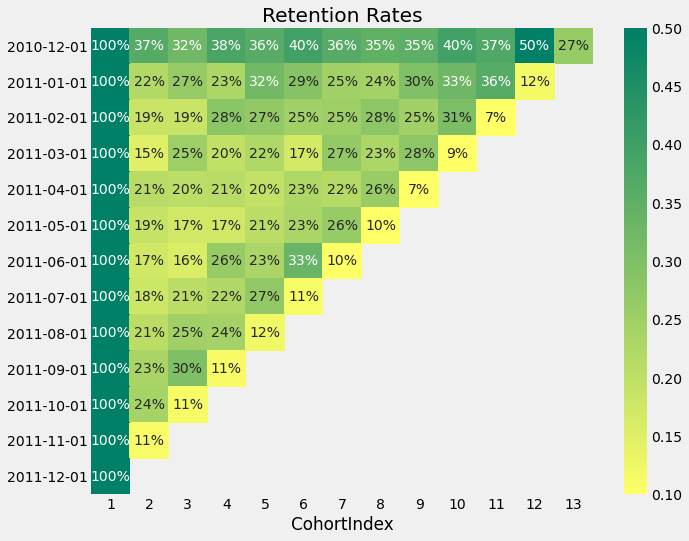

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt
#sns.set()
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,8))
plt.title('Retention Rates')

sns.heatmap(data = retention,
           annot = True,
           fmt = '.0%',
           vmin= 0.1,
           vmax=0.5,
           cmap='summer_r')
plt.show()

# RFM Segmentation
1. Recency (R) : Days Since Last Customer Transaction
2. Frequency (F):  Number of transacations in the last 12 months
3. Monetary Value (M) : Total Spend in the last 12 months



# RFM Data Preperation

 Pandas built-in function #qcut will be used to calculate percentiles
 
To implement RFM Segmentation, we need to further process the data set in by the following steps:

Recency : For each customer ID, calculate the days since the last transaction. Create a hypothetical date maximum Date +1 to make it seem as though we are working on the most recent data substract the max Date of transaction(Most recent date of transation) of the customer. However, usually the data used is Real time data and using the present date would be ideal. 

Frequency: Count the number of invoices per customer to derive the frequency and 
Monetary Data: Sum the amount of money a customer spent and divide it by Frequency, to get the amount per transaction on average, that is the Monetary data.

In [66]:
# create hypothetical snapshot_day as if anlysisng the most recent data
snapshot=max(data.InvoiceDate)+dt.timedelta(days=1)

In [67]:
#Create new column TotalSum
data['TotalSum'] = data['Quantity'] * data['UnitPrice']

In [68]:
# #SneakPeak of the data
# data.head()

# Calculating RFM Metrics
In this section, we add 3 new columns: Recency, Frequency & MonetaryValue

In [69]:
datamart=data.groupby(['CustomerID']).agg({
    'InvoiceDate':lambda x:(snapshot-x.max()).days,
    'InvoiceNo':'count',
    'TotalSum':'sum'
    
    
})


In [70]:
# Rename columns for easy interpretation
datamart.rename(columns={'InvoiceDate':'Recency',
                         'InvoiceNo': 'Frequency',
                         'TotalSum': 'MonetaryValue'},inplace=True

)

In [71]:
#View of The RFM table
datamart.tail()

,Recency,Frequency,MonetaryValue
CustomerID,,,
18280.0,278,10,180.60
18281.0,181,7,80.82
18282.0,8,12,178.05
18283.0,4,721,2045.53
18287.0,43,70,1837.28


# Building RFM Segments
In this section, we assign quartiles for each RFM score.
Frequency and spend ar both considered better if the value is high as opposed to recency whose value is considered if lower.


In [72]:
# group customers into 5 segments of the same size for each RFM value
#Assign quartile value for each Column and name them RFM


In [73]:
# Create Lables for Each RFM Metric:Create generator of values for labels with range function
r_labels=list(range(5,0,-1))
m_labels=range(1,6)
f_labels=range(1,6)

In [74]:
#Create quartile Values using qcut function
r_quartiles=pd.qcut(datamart['Recency'],5,labels=r_labels)
m_quartiles=pd.qcut(datamart['MonetaryValue'],5,labels=m_labels)
f_quartiles=pd.qcut(datamart['Frequency'],5,labels=f_labels)

In [75]:
#Assign R,F,M quartile values to customers
datamart=datamart.assign(R=r_quartiles.values)
datamart=datamart.assign(F=f_quartiles.values,M=m_quartiles.values)

In [76]:
#snealpeak of the added column-R
datamart.head()

,Recency,Frequency,MonetaryValue,R,F,M
CustomerID,,,,,,
12346.0,326,1,77183.60,1,1,5
12347.0,2,182,4310.00,5,5,5
12348.0,75,31,1797.24,2,3,4
12349.0,19,73,1757.55,4,4,4
12350.0,310,17,334.40,1,2,2


In [77]:
# Sneakpeak of the new datamart
datamart.head()

,Recency,Frequency,MonetaryValue,R,F,M
CustomerID,,,,,,
12346.0,326,1,77183.60,1,1,5
12347.0,2,182,4310.00,5,5,5
12348.0,75,31,1797.24,2,3,4
12349.0,19,73,1757.55,4,4,4
12350.0,310,17,334.40,1,2,2


# Building RFM Segment and RFM Score
The RFM segment is derived by concatinating the R-F-M Values 
The RFM Score is derived by summing the R-F-M Values 

In [78]:
# deriving RFM-Segment column
def join_rfm(x) : return str(x['R'])+str(x['F'])+str(x['M'])
datamart['RFM_Segment']=datamart.apply(join_rfm,axis=1)
# Deriving RFM Score column
datamart['RFM_Score']=datamart[['R','F','M']].sum(axis=1)

In [79]:
# snakpeak of  datamart 
datamart.head()

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment,RFM_Score
CustomerID,,,,,,,,
12346.0,326,1,77183.60,1,1,5,1.01.05.0,7
12347.0,2,182,4310.00,5,5,5,5.05.05.0,15
12348.0,75,31,1797.24,2,3,4,2.03.04.0,9
12349.0,19,73,1757.55,4,4,4,4.04.04.0,12
12350.0,310,17,334.40,1,2,2,1.02.02.0,5


# Analysing RFM Segments

In [80]:
datamart.groupby('RFM_Segment').size().sort_values(ascending=False)[:10]

RFM_Segment
5.05.05.0    306
1.01.01.0    271
4.05.05.0    170
1.02.02.0    150
4.04.04.0    125
2.01.01.0    123
2.03.03.0    106
2.02.02.0     93
3.03.03.0     93
5.04.04.0     92
dtype: int64

In [81]:
# Summary metrics per RFM Score
datamart.groupby('RFM_Score').agg({
  'Recency':'mean',
  'MonetaryValue' :'mean',
  'Frequency':['mean','count']
    
    
}).round(1)

Recency MonetaryValue Frequency      
             mean          mean      mean count
RFM_Score                                      
3           278.6         138.6       7.0   271
4           203.4         199.6      11.2   260
5           182.6         295.5      16.3   368
6           126.1         370.4      19.8   385
7           102.7         901.2      26.2   383
8            86.5         627.2      35.9   365
9            70.6         863.5      46.4   359
10           59.1        1118.0      61.9   350
11           45.2        1947.7      80.4   336
12           34.3        1786.4     108.2   335
13           23.2        3100.1     140.8   314
14           15.5        4820.6     230.4   306
15            5.3       11665.5     440.7   306

#### Grouping Customers into 7 Named Segments
Now that we have competed the RFM segmentation, users can be groups into named categories for marketing and profiling purpsoses.
1. MVC (Most Valuable customer): RFM_Score >=12
2. Loyal Customers: RFM_Score between 9 and 11
3. Potentially Loyal: RFM_Score between 7 and 9
4. Need Attention : RFM Score between 5 and 6
5. Lost sheep : RFM_Score < 5


In [82]:
def segment_me(datamart):
    if datamart['RFM_Score']>=12 :
        return 'MVC'
    if(datamart['RFM_Score']>=9) and datamart['RFM_Score']<11:
        return 'Loyal '
    if(datamart['RFM_Score']>=7) and datamart['RFM_Score']<9:
        return 'Potentially Loyal'
    elif(datamart['RFM_Score']>=4) and datamart['RFM_Score']<6:
        return 'Need Attention'
    else:
        return 'Lost Sheep'
    

       

In [83]:
datamart['General_Segment']=datamart.apply(segment_me,axis=1)    
datamart.groupby('General_Segment').agg({
  'Recency':'mean',
  'MonetaryValue' :'mean',
  'Frequency':['mean','count']
    
    }).round(1)

Recency MonetaryValue Frequency      
                     mean          mean      mean count
General_Segment                                        
Lost Sheep          140.4         841.3      36.8   992
Loyal                64.9         989.1      54.0   709
MVC                  19.9        5247.1     226.6  1261
Need Attention      191.2         255.8      14.2   628
Potentially Loyal    94.8         767.5      30.9   748

In [84]:
datamart.head()

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment,RFM_Score,General_Segment
CustomerID,,,,,,,,,
12346.0,326,1,77183.60,1,1,5,1.01.05.0,7,Potentially Loyal
12347.0,2,182,4310.00,5,5,5,5.05.05.0,15,MVC
12348.0,75,31,1797.24,2,3,4,2.03.04.0,9,Loyal
12349.0,19,73,1757.55,4,4,4,4.04.04.0,12,MVC
12350.0,310,17,334.40,1,2,2,1.02.02.0,5,Need Attention


In [85]:
#  datamart[datamart['RFM_Score'] >= 16]

In [86]:
datamart.describe()

,Recency,Frequency,MonetaryValue,RFM_Score
count,4338.000000,4338.000000,4338.000000,4338.000000
mean,92.536422,90.523744,2048.688081,8.991932
std,100.014169,225.506968,8985.230220,3.590290
min,1.000000,1.000000,3.750000,3.000000
25%,18.000000,17.000000,306.482500,6.000000
50%,51.000000,41.000000,668.570000,9.000000
75%,142.000000,98.000000,1660.597500,12.000000
max,374.000000,7676.000000,280206.020000,15.000000
